# Enriching Wine Data with Fire Data and Using Linear Regression

## Modify this later
As a new business, we only have a certain amount of grapes to produce new wine. Using this data set, we would like to know what types of wines were rated best (and with a good price) in specific areas. From the new information we gather, we want to predict the cost of the new wine that would be on the market based on the price of similar types of wine.


As a consumer new to drinking wine, we want to know what types of wine were rated best for a given province and year. That way, when we are looking at bottles of wines in stores, we would know whether a specific bottle had high ratings. 


In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
# Load the cleaned data into dataframe

""" 
    Information of cleaned dataset:
    
    - Province and Variety of wine is transfomed from a categorical attribute to numerical attribute
    - Vintage of wine is extracted from the title of each wine
    - Rows were removed if there were null values present within each of the three attributes (Province, Variety, Vintage)
    - Dataset size was reduced from 125,000 rows to 22,000 rows
    
"""
warnings.simplefilter('ignore')
data = pd.read_csv("../data/California_Wines.csv")
print(data.shape)
data.head()

(35421, 18)


,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage
0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011
1,12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,7,80,2012
2,14,14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,7,125,2012
3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011
4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011


Run linear regression on the wine's points to price to see if there is any correlation

In [3]:
x = data.loc[:, ['points']]

y = data.loc[:, ['price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

0.19298961136454473


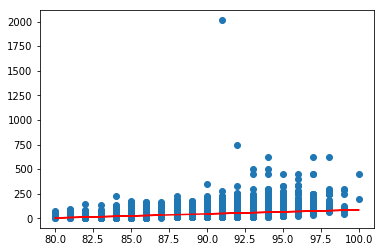

In [4]:
plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

Run linear regression on the wine's vintage to price to see if there is any correlation

0.0002509334927570661


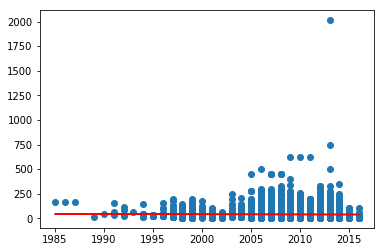

In [5]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

0.031022698407894955


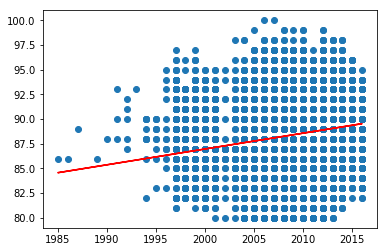

In [8]:
x = data.loc[:, ['vintage']]
y = data.loc[:, ['points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

run linear regression on normalized values

In [6]:
# Normalizing province id between 1 and 0 
data['norm_vintage'] = abs((data.vintage - data.vintage.min()) / (data.vintage.max()))
# Normalizing price between 1 and 0 
data['norm_price'] = abs((data.price - data.price.min()) / (data.price.max()))
# Normalizing points(rating) between 1 and 0 
data['norm_points'] = abs((data.points - data.points.min()) / (data.points.max()))

0.0002509334927570661


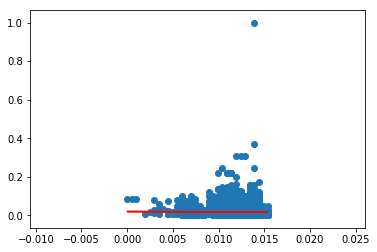

In [7]:
x = data.loc[:, ['norm_vintage']]
y = data.loc[:, ['norm_price']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
plt.plot(x,predict,color = 'red')
plt.show()

In [19]:
import pandas as pd
df_fire = pd.read_csv('../data/filtered_fire_data.csv', sep=',')

In [38]:
# Data cleaning for fire data set
df_fire.LATITUDE.dropna(inplace=True)
df_fire.LONGITUDE.dropna(inplace=True)
df_fire.FIRE_SIZE.dropna(inplace=True)
df_fire.FIRE_YEAR.dropna(inplace=True)

df_fire.LATITUDE.isna().sum()
df_fire.LONGITUDE.isna().sum()
df_fire.FIRE_SIZE.isna().sum()
df_fire.FIRE_YEAR.isna().sum()


0

In [39]:
df_fire

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN
5,5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.635278,-120.103611,5.0,USFS,CA,5,5.0,Amador,NaN
6,6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.688333,-120.153333,5.0,USFS,CA,17,17.0,El Dorado,NaN
7,7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,514,...,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN,NaN
8,8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,514,...,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN,NaN
9,9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,A,38.548333,-120.149167,5.0,USFS,CA,5,5.0,Amador,NaN
